## 1. Orders

In [4]:
#Importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as ticker

In [5]:
filename_data = os.path.join(os.getcwd(),"all_data.csv")
filename_orders = os.path.join(os.getcwd(),"all_orders.csv")

all_data = pd.read_csv(filename_data)
all_orders = pd.read_csv(filename_orders)

In [6]:
cancelled_orders = all_data[all_data['status_item'] == 'Cancelled'].copy()
returned_orders = all_data[all_data['status_item'] == 'Returned'].copy()
complete_orders = all_data[all_data['status_item'].isin(['Complete', 'Shipped'])].copy()
complete_orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97626 entries, 1 to 177353
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id_orderproducts         97626 non-null  int64  
 1   order_id_all             97626 non-null  int64  
 2   user_id_all              97626 non-null  int64  
 3   product_id_all           97626 non-null  int64  
 4   inventory_item_id_all    97626 non-null  int64  
 5   status_item              97626 non-null  object 
 6   created_at_item          97626 non-null  object 
 7   shipped_at_item          97626 non-null  object 
 8   delivered_at_item        44502 non-null  object 
 9   returned_at_item         0 non-null      object 
 10  sale_price_all           97626 non-null  float64
 11  status_order             97626 non-null  object 
 12  gender_orders            97626 non-null  object 
 13  created_at_order         97626 non-null  object 
 14  returned_at_order        0

In [7]:
complete_orders.columns

Index(['id_orderproducts', 'order_id_all', 'user_id_all', 'product_id_all',
       'inventory_item_id_all', 'status_item', 'created_at_item',
       'shipped_at_item', 'delivered_at_item', 'returned_at_item',
       'sale_price_all', 'status_order', 'gender_orders', 'created_at_order',
       'returned_at_order', 'shipped_at_order', 'delivered_at_order',
       'num_of_item', 'id_products', 'cost', 'category', 'name', 'brand',
       'retail_price', 'department', 'sku', 'distribution_center_id',
       'id_orders', 'order_id_items', 'user_id_items', 'product_id_items',
       'inventory_item_id_items', 'status', 'created_at_orders', 'shipped_at',
       'delivered_at', 'returned_at', 'sale_price_items', 'id_user',
       'first_name', 'last_name', 'email', 'age', 'gender_user', 'state',
       'street_address', 'postal_code', 'city', 'country', 'latitude',
       'longitude', 'traffic_source', 'created_at_user'],
      dtype='object')

In [8]:
top_selling_products = complete_orders.groupby(['product_id_all', 'name'])['num_of_item'].sum().reset_index().sort_values('num_of_item', ascending=False)
top_selling_products.head(10)

,product_id_all,name,num_of_item
17973,18795,Life is Good Men's King Of The Grill Short Sle...,30
16252,17045,Bayside Apparel Adult USA-Made Long-Sleeve Poc...,29
7933,8344,Port AuthorityÂ® - Ladies CRBNÂ® Trench,29
23575,24560,Wigwam Men's King Cotton Crew Length Crew Sock,27
23716,24705,San Francisco 49ers NFL Mens Sherpa Slide Slip...,27
7523,7911,Allegra K Ladies Long Sleeve Double Breasted S...,26
26932,28012,Free Country Men's Island Palm Plaid Free C Bo...,26
8203,8624,United Face Womens New Leather Moto Jacket,26
24036,25030,Kentwool Men's Tour Standard Sock,26
26007,27059,ESPN Men's Microfleece Lounge Pants,26


### 1.1 Summarizing Order Data

In [9]:
#Grouping data by product, category and department

complete_orders['inventory_cost'] = complete_orders['cost'] * complete_orders['num_of_item']
complete_orders['product_cost'] = complete_orders['cost'] * complete_orders['num_of_item']
complete_orders['retail_cost'] = complete_orders['retail_price'] * complete_orders['num_of_item']
complete_orders['total_revenue'] = complete_orders['sale_price_all'] * complete_orders['num_of_item']
complete_orders['total_cost'] = complete_orders['inventory_cost'] + complete_orders['retail_cost']
complete_orders['total_profit'] = complete_orders['total_revenue'] - complete_orders['inventory_cost']
complete_orders_summary = complete_orders.groupby(['product_id_all', 'name', 'category', 'department']).agg(
    total_quantity=('num_of_item', 'sum'),  
    inventory_cost=('inventory_cost', 'sum'),
    product_cost=('product_cost', 'sum'),
    retail_cost=('retail_cost', 'sum'),
    total_revenue=('total_revenue', 'sum'),
    total_cost=('total_cost', 'sum'),
    total_profit=('total_profit', 'sum')
).reset_index().sort_values('total_revenue', ascending=False)

#adding profit_per_unit to identify which units are the most profitable
complete_orders_summary['profit_per_unit'] = complete_orders_summary['total_profit'] / complete_orders_summary['total_quantity']
complete_orders_summary['profit_per_unit'] = complete_orders_summary['profit_per_unit'].fillna(0)

# Display the head of the DataFrame to verify the results
complete_orders_summary

,product_id_all,name,category,department,total_quantity,inventory_cost,product_cost,retail_cost,total_revenue,total_cost,total_profit,profit_per_unit
23450,24428,The North Face Apex Bionic Mens Soft Shell Ski...,Outerwear & Coats,Men,20,8397.900031,8397.900031,18060.00,18060.00,26457.900031,9662.099969,483.104998
17255,18062,The North Face Apex Bionic Soft Shell Jacket -...,Active,Men,20,7838.040040,7838.040040,18060.00,18060.00,25898.040040,10221.959960,511.097998
23138,24110,Woolrich Arctic Parka DF,Outerwear & Coats,Men,17,8128.890047,8128.890047,16830.00,16830.00,24958.890047,8701.109953,511.829997
16300,17094,The North Face Apex Bionic Soft Shell Jacket -...,Fashion Hoodies & Sweatshirts,Men,15,7869.645003,7869.645003,13545.00,13545.00,21414.645003,5675.354997,378.357000
9948,10453,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Intimates,Women,12,6144.011998,6144.011998,10836.00,10836.00,16980.011998,4691.988002,390.999000
...,...,...,...,...,...,...,...,...,...,...,...,...
13848,14549,Motherhood Maternity: Bra Back Extender,Maternity,Women,1,0.784080,0.784080,1.98,1.98,2.764080,1.195920,1.195920
2899,3049,Pink Ribbon Breast Cancer Awareness Knee High ...,Active,Women,1,0.916500,0.916500,1.95,1.95,2.866500,1.033500,1.033500
11931,12536,Individual Bra Extenders,Intimates,Women,1,1.013250,1.013250,1.75,1.75,2.763250,0.736750,0.736750
13604,14298,Classic Tear Drop Mirror Lens Aviator Sunglasses,Accessories,Women,1,0.645000,0.645000,1.72,1.72,2.365000,1.075000,1.075000


In [10]:
def print_highest_in_category(df, column_name, metric_name):
    # Find the index of the highest value for the given column
    max = df[column_name].idxmax()
    highest_row = df.loc[max]
    print(f"Category with Highest {metric_name}:")
    print(f"Product Category: {highest_row['category']}, Product Department: {highest_row['department']}, {metric_name}: {highest_row[column_name]}\n")

# Execute the function for each metric
print_highest_in_category(complete_orders_summary, 'profit_per_unit', 'Profit per Unit')
print_highest_in_category(complete_orders_summary, 'total_revenue', 'Total Revenue')
print_highest_in_category(complete_orders_summary, 'total_profit', 'Total Profit')
print_highest_in_category(complete_orders_summary, 'total_quantity', 'Total Quantity')

Category with Highest Profit per Unit:
Product Category: Outerwear & Coats, Product Department: Men, Profit per Unit: 594.4049988090992

Category with Highest Total Revenue:
Product Category: Outerwear & Coats, Product Department: Men, Total Revenue: 18060.0

Category with Highest Total Profit:
Product Category: Active, Product Department: Men, Total Profit: 10221.95995990187

Category with Highest Total Quantity:
Product Category: Active, Product Department: Men, Total Quantity: 30



Takeaways so far:
1. Men sell more items and generate more revenue than women.
2. Outerwear & Coats generate the most revenue for Men but Active wear generates the most profit.

### 1.2 Profits and Revenue

In [11]:
#fixing the date/time format within the dataframe
dateTime_columns = ['created_at_item', 'shipped_at_item', 'delivered_at_item', 'returned_at_item']

for column in dateTime_columns:
    complete_orders[column] = pd.to_datetime(complete_orders[column], errors = 'coerce')

complete_orders = complete_orders.dropna(subset=dateTime_columns, how='all')

#### Profit and Revenue breakdown by department

In [12]:
revenue_profit_summary = complete_orders.groupby('department').agg(
    total_revenue_sum=('total_revenue', 'sum'),
    total_profit_sum=('total_profit', 'sum')
).reset_index()

revenue_profit_summary.head(10)

,department,total_revenue_sum,total_profit_sum
0,Men,5.898639e+06,3.054108e+06
1,Women,5.206434e+06,2.710452e+06


#### Breakdown by the Men's Department

In [13]:
#Summarize the mens data to break it down by product_category.
men_summary = complete_orders_summary[complete_orders_summary['department'] == 'Men'].groupby(
    ['department', 'category']).agg(
    total_inventory_cost=('inventory_cost','sum'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_quantity=('total_quantity', 'sum')
).reset_index().sort_values(by=['total_profit'], ascending=[False])

# Calculate profit per unit
men_summary['profit_per_unit'] = men_summary['total_profit'] / men_summary['total_quantity']

# Ensure no division by zero errors
men_summary['profit_per_unit'] = men_summary['profit_per_unit'].fillna(0)

men_summary.head()

,department,category,total_inventory_cost,total_revenue,total_profit,total_quantity,profit_per_unit
4,Men,Outerwear & Coats,385791.678910,874260.508936,488468.830025,5741,85.084276
9,Men,Suits & Sport Coats,271592.306116,674974.079088,403381.772972,5302,76.081059
3,Men,Jeans,438602.990878,823461.710564,384858.719686,8025,47.957473
10,Men,Sweaters,271526.327086,542533.160645,271006.833558,7070,38.331943
5,Men,Pants,206108.722215,448873.211071,242764.488856,7488,32.420471


#### Breakdown by the Women's Department

In [14]:
#Summarize the mens data to break it down by product_category.
women_summary = complete_orders_summary[complete_orders_summary['department'] == 'Women'].groupby(
    ['department', 'category']).agg(
    total_inventory_cost=('inventory_cost','sum'),
    total_revenue=('total_revenue', 'sum'),
    total_profit=('total_profit', 'sum'),
    total_quantity=('total_quantity', 'sum')
).reset_index().sort_values(by=['total_profit'], ascending=[False])

# Calculate profit per unit
women_summary['profit_per_unit'] = women_summary['total_profit'] / women_summary['total_quantity']

# Ensure no division by zero errors
women_summary['profit_per_unit'] = women_summary['profit_per_unit'].fillna(0)

women_summary.head()

,department,category,total_inventory_cost,total_revenue,total_profit,total_quantity,profit_per_unit
11,Women,Outerwear & Coats,227789.183349,504164.490107,276375.306757,3580,77.199806
4,Women,Dresses,219258.244618,486562.341166,267304.096548,5720,46.731485
6,Women,Intimates,251848.394599,473503.580320,221655.185721,13670,16.214717
7,Women,Jeans,254846.705123,471713.231444,216866.526322,5032,43.097481
20,Women,Swim,138531.765973,328013.630095,189481.864122,5075,37.336328


In [15]:
complete_orders['year_month'] = complete_orders['created_at_item'].dt.to_period('M')

# Aggregate profit by year and month
profit_trends = complete_orders.groupby(['year_month', 'department']).agg(
    total_profit = ('total_profit', 'sum'),
    total_revenue = ('total_revenue', 'sum')
).reset_index()

profit_trends.head()

C:\Users\asmi_\AppData\Local\Temp\ipykernel_370660\1609034246.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  complete_orders['year_month'] = complete_orders['created_at_item'].dt.to_period('M')


,year_month,department,total_profit,total_revenue
0,2019-01,Women,1175.106844,2352.980005
1,2019-02,Men,1531.757801,2890.260008
2,2019-02,Women,1133.500332,2109.190002
3,2019-03,Men,1165.362280,2204.179999
4,2019-03,Women,1213.385197,2458.020014


#### Profit Trend by Department

<Figure size 1400x800 with 0 Axes>

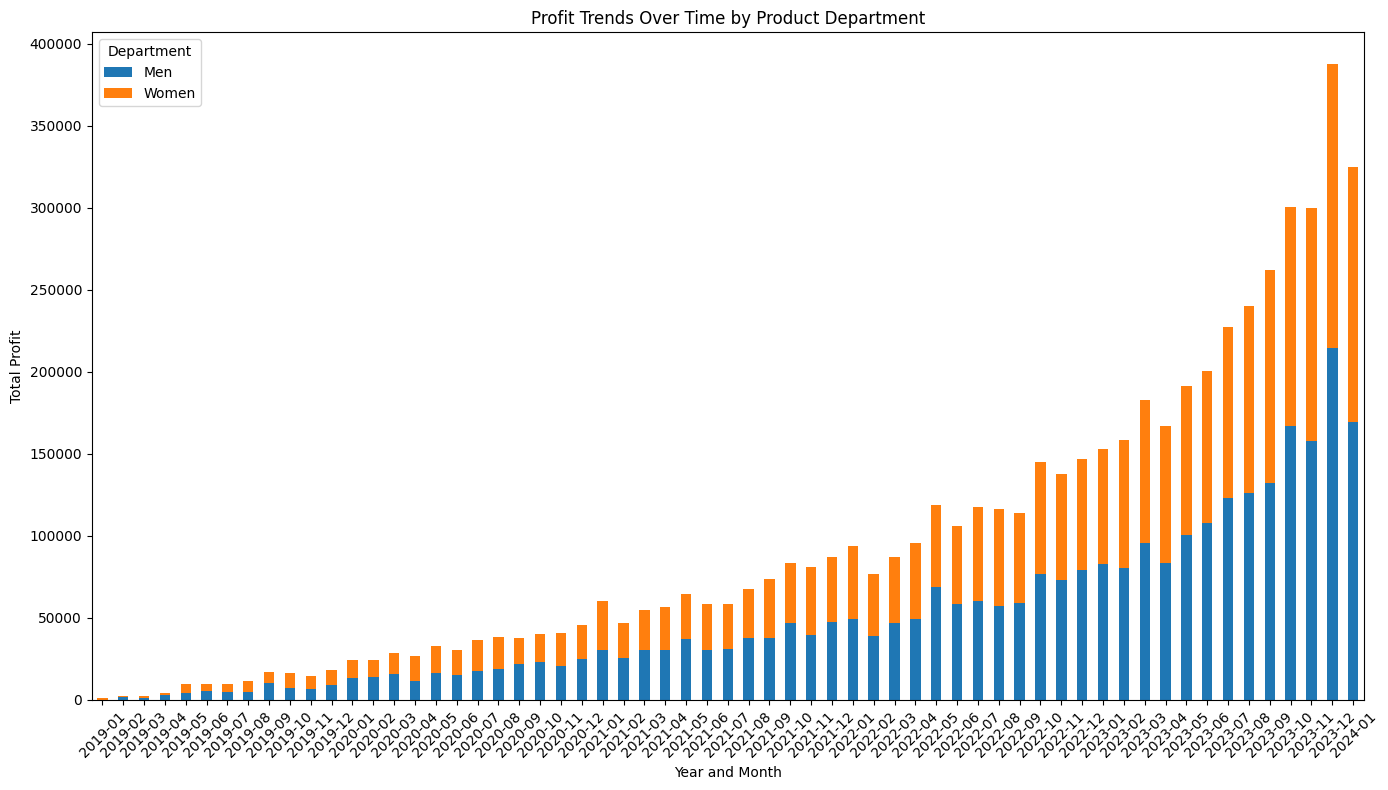

<Figure size 640x480 with 0 Axes>

In [16]:
plot_data = complete_orders[['year_month', 'department', 'total_profit']]
plot_data_grouped = plot_data.groupby(['year_month', 'department'])['total_profit'].sum().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 8))
plot_data_grouped.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Profit Trends Over Time by Product Department')
plt.xlabel('Year and Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Department')
plt.tight_layout()

plt.show()
plt.savefig("profitTrendsOverTimeByProduct.png")

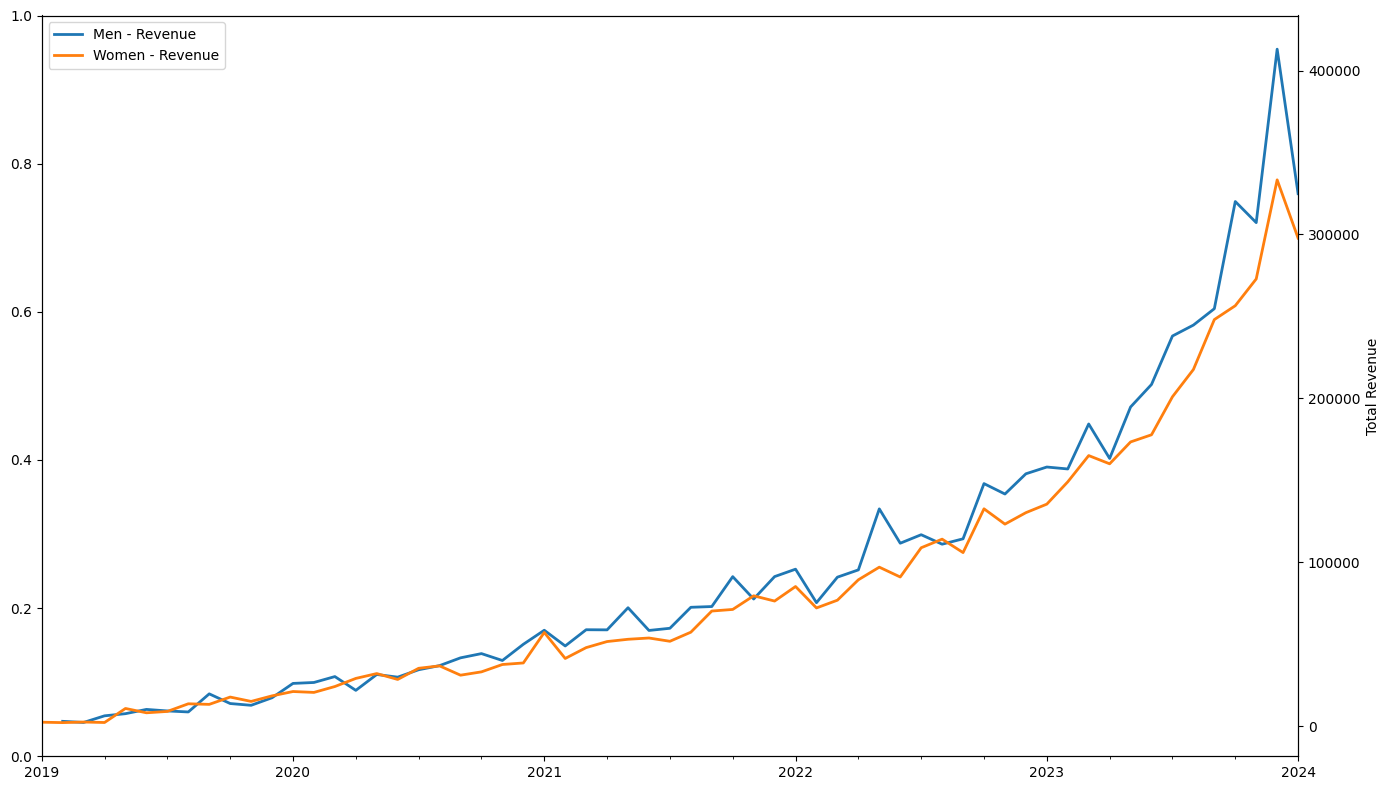

In [17]:
# Preparing data for plotting both profit and revenue trends over time for Men and Women departments
plot_data_combined = profit_trends.pivot(index='year_month', columns='department', values=['total_profit', 'total_revenue'])

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 8))

# Creating a second y-axis for revenue line graph
ax2 = ax1.twinx()
plot_data_combined['total_revenue'].plot(ax=ax2, linewidth=2)
ax2.set_ylabel('Total Revenue', color='black')
ax2.tick_params(axis='y', labelcolor='black')

fig.tight_layout()
plt.legend(['Men - Revenue', 'Women - Revenue'], loc='upper left')
plt.show()

C:\Users\asmi_\AppData\Local\Temp\ipykernel_370660\2371220231.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  complete_orders['year'] = complete_orders['created_at_item'].dt.to_period('Y')


<Figure size 1400x800 with 0 Axes>

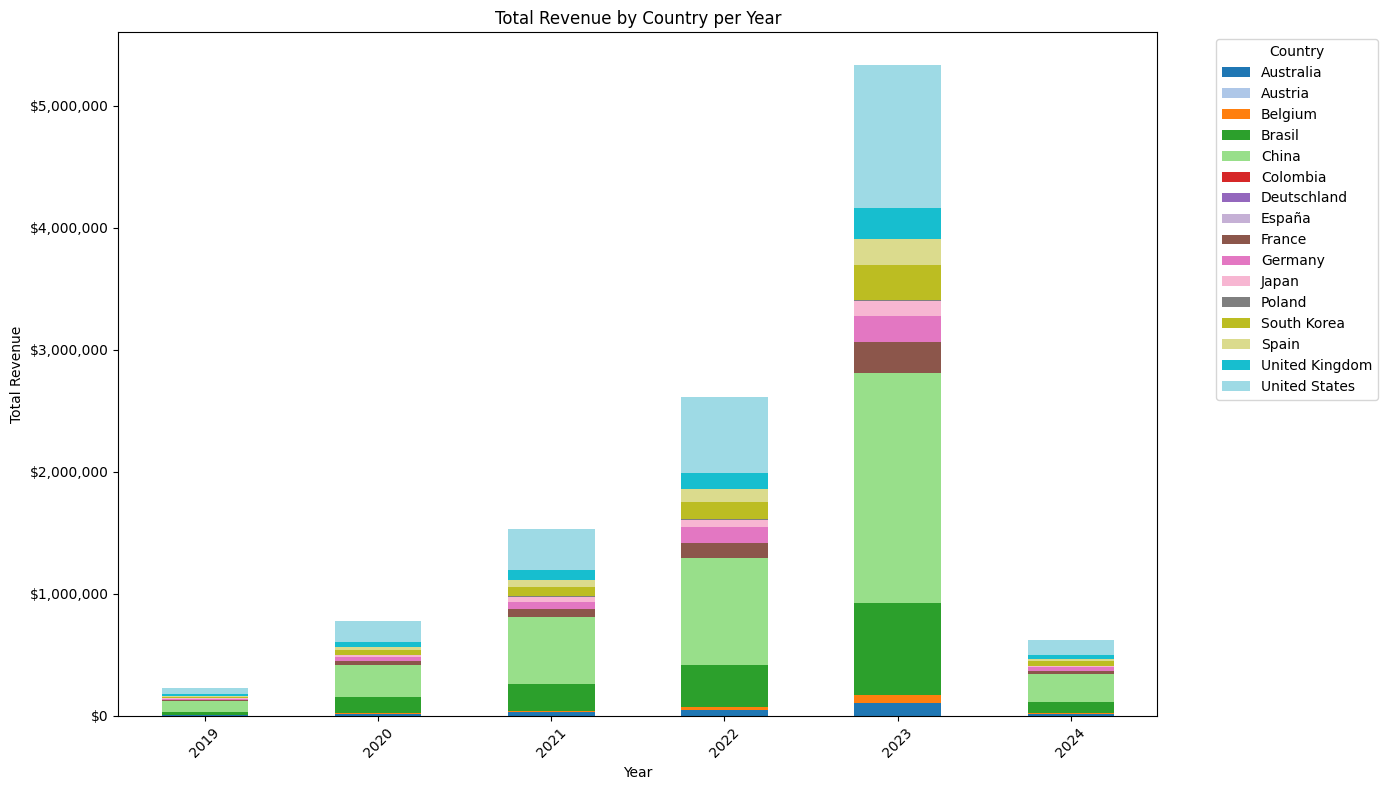

In [18]:
complete_orders['year'] = complete_orders['created_at_item'].dt.to_period('Y')
revenue_by_year_country = complete_orders.groupby(['year', 'country'])['total_revenue'].sum().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
ax = revenue_by_year_country.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))  # Formatting y-axis as full dollar amounts

plt.title('Total Revenue by Country per Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [19]:
country_analysis = complete_orders.groupby('country').agg(
    transactions=('order_id_all', 'nunique'),  # Count unique orders as transactions
    total_revenue=('total_revenue', 'sum')
).reset_index().sort_values(by='transactions', ascending=False)

countries_by_transactions = country_analysis.sort_values(by='transactions', ascending=False)
countries_by_revenue = country_analysis.sort_values(by='total_revenue', ascending=False)

country_analysis.head()

,country,transactions,total_revenue
4,China,23028,3.888448e+06
15,United States,15173,2.487312e+06
3,Brasil,9702,1.554442e+06
12,South Korea,3599,5.903793e+05
8,France,3231,5.217557e+05


In [20]:
countries_by_transactions

,country,transactions,total_revenue
4,China,23028,3.888448e+06
15,United States,15173,2.487312e+06
3,Brasil,9702,1.554442e+06
12,South Korea,3599,5.903793e+05
8,France,3231,5.217557e+05
14,United Kingdom,3046,5.336308e+05
9,Germany,2847,4.639156e+05
13,Spain,2633,4.341487e+05
10,Japan,1602,2.616951e+05
0,Australia,1392,2.161159e+05


In [21]:
pd.set_option('display.max_columns', None)

complete_orders['created_at_order'] = pd.to_datetime(complete_orders['created_at_order'])

# Adjusting the data to aggregate by country and by quarter
complete_orders['created_at'] = pd.to_datetime(complete_orders['created_at_order']).dt.tz_localize(None)
complete_orders['year_quarter'] = complete_orders['created_at_order'].dt.to_period('Q')

# Aggregate data by country and year_quarter, summing the total revenue
revenue_by_quarter = complete_orders.groupby(['country', 'year_quarter'])['total_revenue'].sum().unstack(fill_value=0)
# Display the resulting table
revenue_by_quarter

C:\Users\asmi_\AppData\Local\Temp\ipykernel_370660\3351397168.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  complete_orders['year_quarter'] = complete_orders['created_at_order'].dt.to_period('Q')


year_quarter,2019Q1,2019Q2,2019Q3,2019Q4,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,2024Q1
country,,,,,,,,,,,,,,,,,,,,,
Australia,59.500000,539.209999,2546.270014,785.360004,2224.590004,4198.860030,3153.570005,6347.630002,9602.740017,6910.310000,3969.800003,8086.420010,8743.350012,12307.070016,9542.950022,19212.540032,17220.079987,17448.220050,30803.220017,42390.010082,10024.220017
Austria,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.500000,0.000000
Belgium,0.000000,268.910002,338.719999,2386.369999,2748.849993,1151.179987,2997.480003,3381.690021,4005.089997,1691.570011,4390.060014,5358.649982,3720.000029,3182.600019,10919.079961,8512.120022,14617.140012,10509.480009,16754.519979,23079.620049,9771.410027
Brasil,1940.840002,4343.690006,9570.519999,12683.479960,25055.869940,24922.760028,43710.619975,30607.310006,41816.660049,51612.630094,55385.590071,66166.849940,57395.220088,80525.890265,91937.580249,111294.710182,140342.080091,150879.940201,184347.200104,282492.480196,87410.049997
China,5329.380021,19069.320050,25972.969961,36746.370040,46784.579967,57597.030064,67257.410078,94662.200060,109132.340066,128808.090167,132569.660007,180180.370251,172871.530342,200835.300308,237383.980419,276184.480439,329734.320303,372837.870327,495294.810591,691501.710319,207694.450261
Colombia,0.000000,0.000000,0.000000,0.000000,0.000000,22.709999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.540001,181.450000,64.949997,19.950001,169.980000,0.000000
Deutschland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.990005,0.000000,0.000000
España,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
France,660.980001,3522.659992,1671.630001,5513.680021,6866.450033,10241.710006,10448.430024,9078.699995,13309.399970,17997.450006,19663.090021,15566.320024,29065.480037,32978.120008,23732.630057,38703.220055,41789.960006,64453.090017,62268.710139,86511.090160,27712.920043


China appears to have the highest transaction count and highest total revenue. However, it seems like Austria, Deutschland, Espana, and Colombia have the least amount of transcations and volumes. The 5th lowest country (Poland), has more combined transactions and revenue than the other 4 combined.

### 1.4 Returned Orders

In [22]:
status_counts = all_data['status_item'].value_counts()

status_percentages = (status_counts / all_data.shape[0]) * 100

# Combining counts and percentages into a single dataframe
status_summary = pd.DataFrame({
    'Count': status_counts,
    'Percentage': status_percentages
}).reset_index().rename(columns={'index': 'Status'})

status_summary

,status_item,Count,Percentage
0,Shipped,53124,29.953652
1,Complete,44502,25.092189
2,Processing,35480,20.005187
3,Cancelled,26464,14.921569
4,Returned,17784,10.027403


10 % or orders were returned and 15% were cancelled. The 15% cancellation may be of concern and worth looking into but, we will focus on the returned orders first for now.

In [23]:
returned_orders.head()

,id_orderproducts,order_id_all,user_id_all,product_id_all,inventory_item_id_all,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price_all,status_order,gender_orders,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,id_products,cost,category,name,brand,retail_price,department,sku,distribution_center_id,id_orders,order_id_items,user_id_items,product_id_items,inventory_item_id_items,status,created_at_orders,shipped_at,delivered_at,returned_at,sale_price_items,id_user,first_name,last_name,email,age,gender_user,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user
18,142854,98355,78482,28700,385646,Returned,2023-10-13 06:08:29+00:00,2023-10-14 02:38:00+00:00,2023-10-14 20:04:00+00:00,2023-10-17 00:08:00+00:00,1.50,Returned,M,2023-10-13 07:02:00+00:00,2023-10-17 00:08:00+00:00,2023-10-14 02:38:00+00:00,2023-10-14 20:04:00+00:00,3,28700,0.60600,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,1.50,Men,851E8EAF4988ED55C3D335EA8D5ED61B,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78482,Gabriel,Reynolds,gabrielreynolds@example.com,23,M,Rio Grande do Sul,1239 Peck Shores Suite 557,97300-000,São Gabriel,Brasil,-30.303923,-54.365469,Search,2023-09-28 07:02:00+00:00
23,12417,8613,6882,13629,33494,Returned,2024-01-12 17:39:04+00:00,2024-01-13 04:11:00+00:00,2024-01-16 17:17:00+00:00,2024-01-18 13:53:00+00:00,1.51,Returned,F,2024-01-12 17:52:00+00:00,2024-01-18 13:53:00+00:00,2024-01-13 04:11:00+00:00,2024-01-16 17:17:00+00:00,1,13629,0.64477,Accessories,Solid Color Leather Adjustable Skinny Belt with,boxed-gifts,1.51,Women,1BB2CDD9A728AF16A32AEE019A012FB0,10,33494.0,23076.0,18418.0,4572.0,90349.0,Complete,2021-03-18 10:00:51+00:00,2021-03-19 01:07:00+00:00,2021-03-19 06:24:00+00:00,NaN,118.50,6882,Cathy,Woodard,cathywoodard@example.com,53,F,California,7488 Jesse Run,92882,Corona,United States,33.842021,-117.604167,Search,2023-11-14 17:52:00+00:00
28,49378,33965,27223,14298,133187,Returned,2023-05-15 02:22:01+00:00,2023-05-14 18:35:00+00:00,2023-05-18 21:12:00+00:00,2023-05-20 07:23:00+00:00,1.72,Returned,F,2023-05-14 02:49:00+00:00,2023-05-20 07:23:00+00:00,2023-05-14 18:35:00+00:00,2023-05-18 21:12:00+00:00,3,14298,0.64500,Accessories,Classic Tear Drop Mirror Lens Aviator Sunglasses,Urban Boundaries Eyewear,1.72,Women,56DE534CF589F6D0CA09630DB803BA00,5,133187.0,91669.0,73096.0,17170.0,359573.0,Complete,2023-08-17 06:31:20+00:00,2023-08-18 08:17:00+00:00,2023-08-23 00:23:00+00:00,NaN,37.98,27223,Paula,Perez,paulaperez@example.com,43,F,Texas,550 Hansen Road,77070,Houston,United States,29.977704,-95.572943,Organic,2019-04-14 02:49:00+00:00
55,93025,64020,51156,3049,251111,Returned,2023-03-05 16:41:10+00:00,2023-03-08 08:36:00+00:00,2023-03-11 21:56:00+00:00,2023-03-13 02:11:00+00:00,1.95,Returned,F,2023-03-05 18:43:00+00:00,2023-03-13 02:11:00+00:00,2023-03-08 08:36:00+00:00,2023-03-11 21:56:00+00:00,1,3049,0.91650,Active,Pink Ribbon Breast Cancer Awareness Knee High ...,Palmetto Fundraising,1.95,Women,4FA177DF22864518B2D7818D4DB5DB2D,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51156,Tracy,Nichols,tracynichols@example.net,62,F,Amazonas,40207 Diaz Brooks,69084,Manaus,Brasil,-3.077894,-59.932742,Search,2020-06-13 18:43:00+00:00
56,140789,96914,77336,3049,380056,Returned,2022-09-05 05:21:32+00:00,2022-09-05 08:22:00+00:00,2022-09-08 16:11:00+00:00,2022-09-10 01:15:00+00:00,1.95,Returned,F,2022-09-04 08:21:00+00:00,2022-09-10 01:15:00+00:00,2022-09-05 08:22:00+00:00,2022-09-08 16:11:00+00:00,3,3049,0.91650,Active,Pink Ribbon Breast Cancer Awareness Knee High ...,Palmetto Fundraising,1.95,Women,4FA177DF22864518B2D7818D4DB5DB2D,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77336,Carol,Rios,carolrios@example.org,13,F,Sachsen-Anhalt,358 Ashley River,6217,Merseburg,Germany,51.345747,11.974885,Organic,2019-01-10 08:21:00+00:00


In [24]:
#Most returned by Product
most_returned = returned_orders['name'].value_counts().reset_index()
most_returned.columns = ['Product Name', 'Return Count']
most_returned.head(10)

,Product Name,Return Count
0,Vintage 1946 Men's Military Twill,6
1,Ray-Ban RB3293 Bubble Wrap Aviator Sunglasses,6
2,Men's Darn Tough Vermont Small Stripe Crew Lig...,6
3,Fox Moto-X Zip Hoody 2,6
4,ASICS Men's ASX Boxer,6
5,Puma Men's Socks,6
6,Fruit of the Loom Men's Boxer Briefs 4 Pack,5
7,Nike Vapor Mens Wind and Rain Jacket,5
8,Frederick's of Hollywood Ruched Lace Teddy Womens,5
9,Evan Picone Water Color Pant Suit,5


In [25]:
#Most returned by Brand
most_returned_brand = returned_orders.groupby('brand')['num_of_item'].sum().reset_index()
most_returned_brand.columns = ['Product Brand', 'Return Count']

most_returned_brand = most_returned_brand.sort_values(by='Return Count', ascending=False).head(5)
most_returned_brand

,Product Brand,Return Count
73,Allegra K,1130
335,Calvin Klein,617
350,Carhartt,409
1897,Volcom,365
1268,Nautica,360


In [26]:
#Most returned by department
most_returned_department = returned_orders['department'].value_counts().reset_index()
most_returned_department.columns = ['Product Department', 'Return Count']
most_returned_department.head()

,Product Department,Return Count
0,Women,8974
1,Men,8810


In [27]:
#Most returned by product_category
most_returned_pc = returned_orders.groupby('category')['num_of_item'].sum().reset_index()
most_returned_pc.columns = ['Category', 'Return Count']

most_returned_pc = most_returned_pc.sort_values(by='Return Count', ascending=False)
most_returned_pc

,Category,Return Count
6,Intimates,2519
5,Fashion Hoodies & Sweatshirts,2225
7,Jeans,2224
24,Tops & Tees,2183
23,Swim,2121
15,Shorts,2103
22,Sweaters,2103
17,Sleep & Lounge,1988
0,Accessories,1763
11,Outerwear & Coats,1739


We still can't get a return reason out of the data, so we can try diving into the brands itself, particularly 'Allegra K', since they have twice as many returns as the next brand.

Women are the ones primarily returning Allegra K. It seems that 17% of Orders for this brand are returned. It could highlight a quality issue such as the products not fitting as advertised or just being poorly made. However, as there is no tracking for the reasons why the items were returned, we have no way to find that out for certain.

### 1.5 Cancelled Orders

In [28]:
cancelled_orders.head()

,id_orderproducts,order_id_all,user_id_all,product_id_all,inventory_item_id_all,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price_all,status_order,gender_orders,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,id_products,cost,category,name,brand,retail_price,department,sku,distribution_center_id,id_orders,order_id_items,user_id_items,product_id_items,inventory_item_id_items,status,created_at_orders,shipped_at,delivered_at,returned_at,sale_price_items,id_user,first_name,last_name,email,age,gender_user,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaN,NaN,NaN,1,14235,0.00830,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83582,Kathryn,Ortega,kathrynortega@example.net,29,F,Hebei,3863 Johnson Brooks Suite 474,74199,Jinhua,China,39.388173,115.731465,Search,2021-11-27 07:33:00+00:00
10,132745,91372,72876,14202,358368,Cancelled,2023-03-29 07:54:55+00:00,NaN,NaN,NaN,1.50,Cancelled,F,2023-03-29 11:21:00+00:00,NaN,NaN,NaN,2,14202,0.61800,Accessories,GENUINE LEATHER SNAP ON STUDDED WHITE PIANO BE...,H2W,1.50,Women,5A834EC7E9DC45A5FAE01DC7497E534F,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72876,Amy,Sanchez,amysanchez@example.net,35,F,Minas Gerais,61384 Zachary Lodge Suite 626,35900,Itabira,Brasil,-19.632558,-43.218684,Display,2021-01-28 11:21:00+00:00
11,166920,114977,91839,28700,450614,Cancelled,2020-07-02 15:08:04+00:00,NaN,NaN,NaN,1.50,Cancelled,M,2020-06-28 17:40:00+00:00,NaN,NaN,NaN,2,28700,0.60600,Accessories,Wayfarer Style Sunglasses Dark Lens Black Frame,Wayfayrer,1.50,Men,851E8EAF4988ED55C3D335EA8D5ED61B,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91839,Steven,Blake,stevenblake@example.com,57,M,California,956 Joshua Spurs Suite 954,90037,Los Angeles,United States,34.003199,-118.287615,Search,2019-12-15 17:40:00+00:00
26,142090,97824,78066,14298,383592,Cancelled,2023-06-25 11:40:22+00:00,NaN,NaN,NaN,1.72,Cancelled,F,2023-06-25 13:14:00+00:00,NaN,NaN,NaN,1,14298,0.64500,Accessories,Classic Tear Drop Mirror Lens Aviator Sunglasses,Urban Boundaries Eyewear,1.72,Women,56DE534CF589F6D0CA09630DB803BA00,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78066,Charlene,Turner,charleneturner@example.org,64,F,Principado de Asturias,161 Perry Springs,33210,Gijón,Spain,43.523698,-5.669284,Search,2023-01-03 13:14:00+00:00
30,181002,124695,99579,12536,488701,Cancelled,2022-11-19 17:26:48+00:00,NaN,NaN,NaN,1.75,Cancelled,F,2022-11-17 18:37:00+00:00,NaN,NaN,NaN,3,12536,1.01325,Intimates,Individual Bra Extenders,Extenders,1.75,Women,359499F804EA7988921BF86C9377FB95,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99579,Rebecca,Martinez,rebeccamartinez@example.net,21,F,Henan,7874 Nancy Gardens Apt. 574,474150,Hangzhou,China,32.698418,112.071473,Search,2022-10-13 18:37:00+00:00


In [29]:
cancelled_orders['product_id_all'].value_counts().head(10)

product_id_all
22682    6
23436    6
10402    6
18979    6
20784    6
20639    6
22185    6
20951    6
21931    6
23925    6
Name: count, dtype: int64

In [30]:
cancelled_orders['country'].value_counts().head(10)

country
China             9323
United States     5740
Brasil            3949
South Korea       1341
France            1281
United Kingdom    1183
Germany           1118
Spain             1044
Japan              592
Australia          543
Name: count, dtype: int64

In [31]:
cancelled_orders['department'].value_counts().head(10)

department
Men      13235
Women    13229
Name: count, dtype: int64

In [32]:
cancelled_orders['category'].value_counts().head(10)

category
Intimates                        1957
Jeans                            1900
Tops & Tees                      1749
Fashion Hoodies & Sweatshirts    1707
Swim                             1681
Sweaters                         1632
Shorts                           1608
Sleep & Lounge                   1547
Accessories                      1494
Active                           1310
Name: count, dtype: int64

In [33]:
cancelled_orders['traffic_source'].value_counts()

traffic_source
Search      18681
Organic      4077
Facebook     1480
Email        1256
Display       970
Name: count, dtype: int64

It looks like a great chunk of the cancelled orders come from Search (more than the others combined).

### Investigating Features

In [36]:
all_data.describe()

,id_orderproducts,order_id_all,user_id_all,product_id_all,inventory_item_id_all,sale_price_all,num_of_item,id_products,cost,retail_price,distribution_center_id,id_orders,order_id_items,user_id_items,product_id_items,inventory_item_id_items,sale_price_items,id_user,age,latitude,longitude
count,177354.00000,177354.000000,177354.000000,177354.000000,177354.00000,177354.000000,177354.000000,177354.000000,177354.000000,177354.000000,177354.000000,64140.000000,64140.000000,64140.000000,64140.000000,64140.000000,64140.000000,177354.000000,177354.000000,177354.000000,177354.000000
mean,90898.40029,62592.629053,49993.392058,15251.237632,245341.51983,59.538380,1.901857,15251.237632,28.644680,59.538380,5.009326,90992.922466,62657.741425,50045.482258,15257.066105,245596.711038,59.613914,49993.392058,41.079378,28.381308,25.446165
std,52448.60657,36111.632539,28819.414804,8414.881047,141605.66370,66.594889,1.066538,8414.881047,30.991888,66.594889,2.899838,52434.867596,36102.227327,28811.809653,8413.430349,141568.638246,66.556706,28819.414804,17.034574,21.961282,89.872971
min,1.00000,1.000000,1.000000,1.000000,3.00000,0.020000,1.000000,1.000000,0.008300,0.020000,1.000000,3.000000,1.000000,1.000000,1.000000,9.000000,0.020000,1.000000,12.000000,-43.007536,-158.164931
25%,45484.25000,31299.250000,25055.250000,7972.000000,122687.50000,24.500000,1.000000,7972.000000,11.362000,24.500000,2.000000,45697.500000,31454.500000,25173.000000,7994.750000,123252.500000,24.639999,25055.250000,26.000000,26.188451,-50.529824
50%,90911.50000,62551.500000,50000.500000,15958.000000,245363.00000,39.990002,2.000000,15958.000000,19.824570,39.990002,5.000000,91075.000000,62673.000000,50096.000000,15936.000000,245793.500000,39.990002,50000.500000,41.000000,35.214427,5.037560
75%,136284.75000,93820.750000,74843.750000,22503.000000,367882.50000,69.949997,2.000000,22503.000000,34.541500,69.949997,8.000000,136407.500000,93905.250000,74910.250000,22516.000000,368229.250000,69.949997,74843.750000,56.000000,40.725798,116.381016
max,181759.00000,125226.000000,100000.000000,29120.000000,490705.00000,999.000000,4.000000,29120.000000,557.151002,999.000000,10.000000,181758.000000,125225.000000,100000.000000,29120.000000,490703.000000,999.000000,100000.000000,70.000000,64.865194,153.560238
